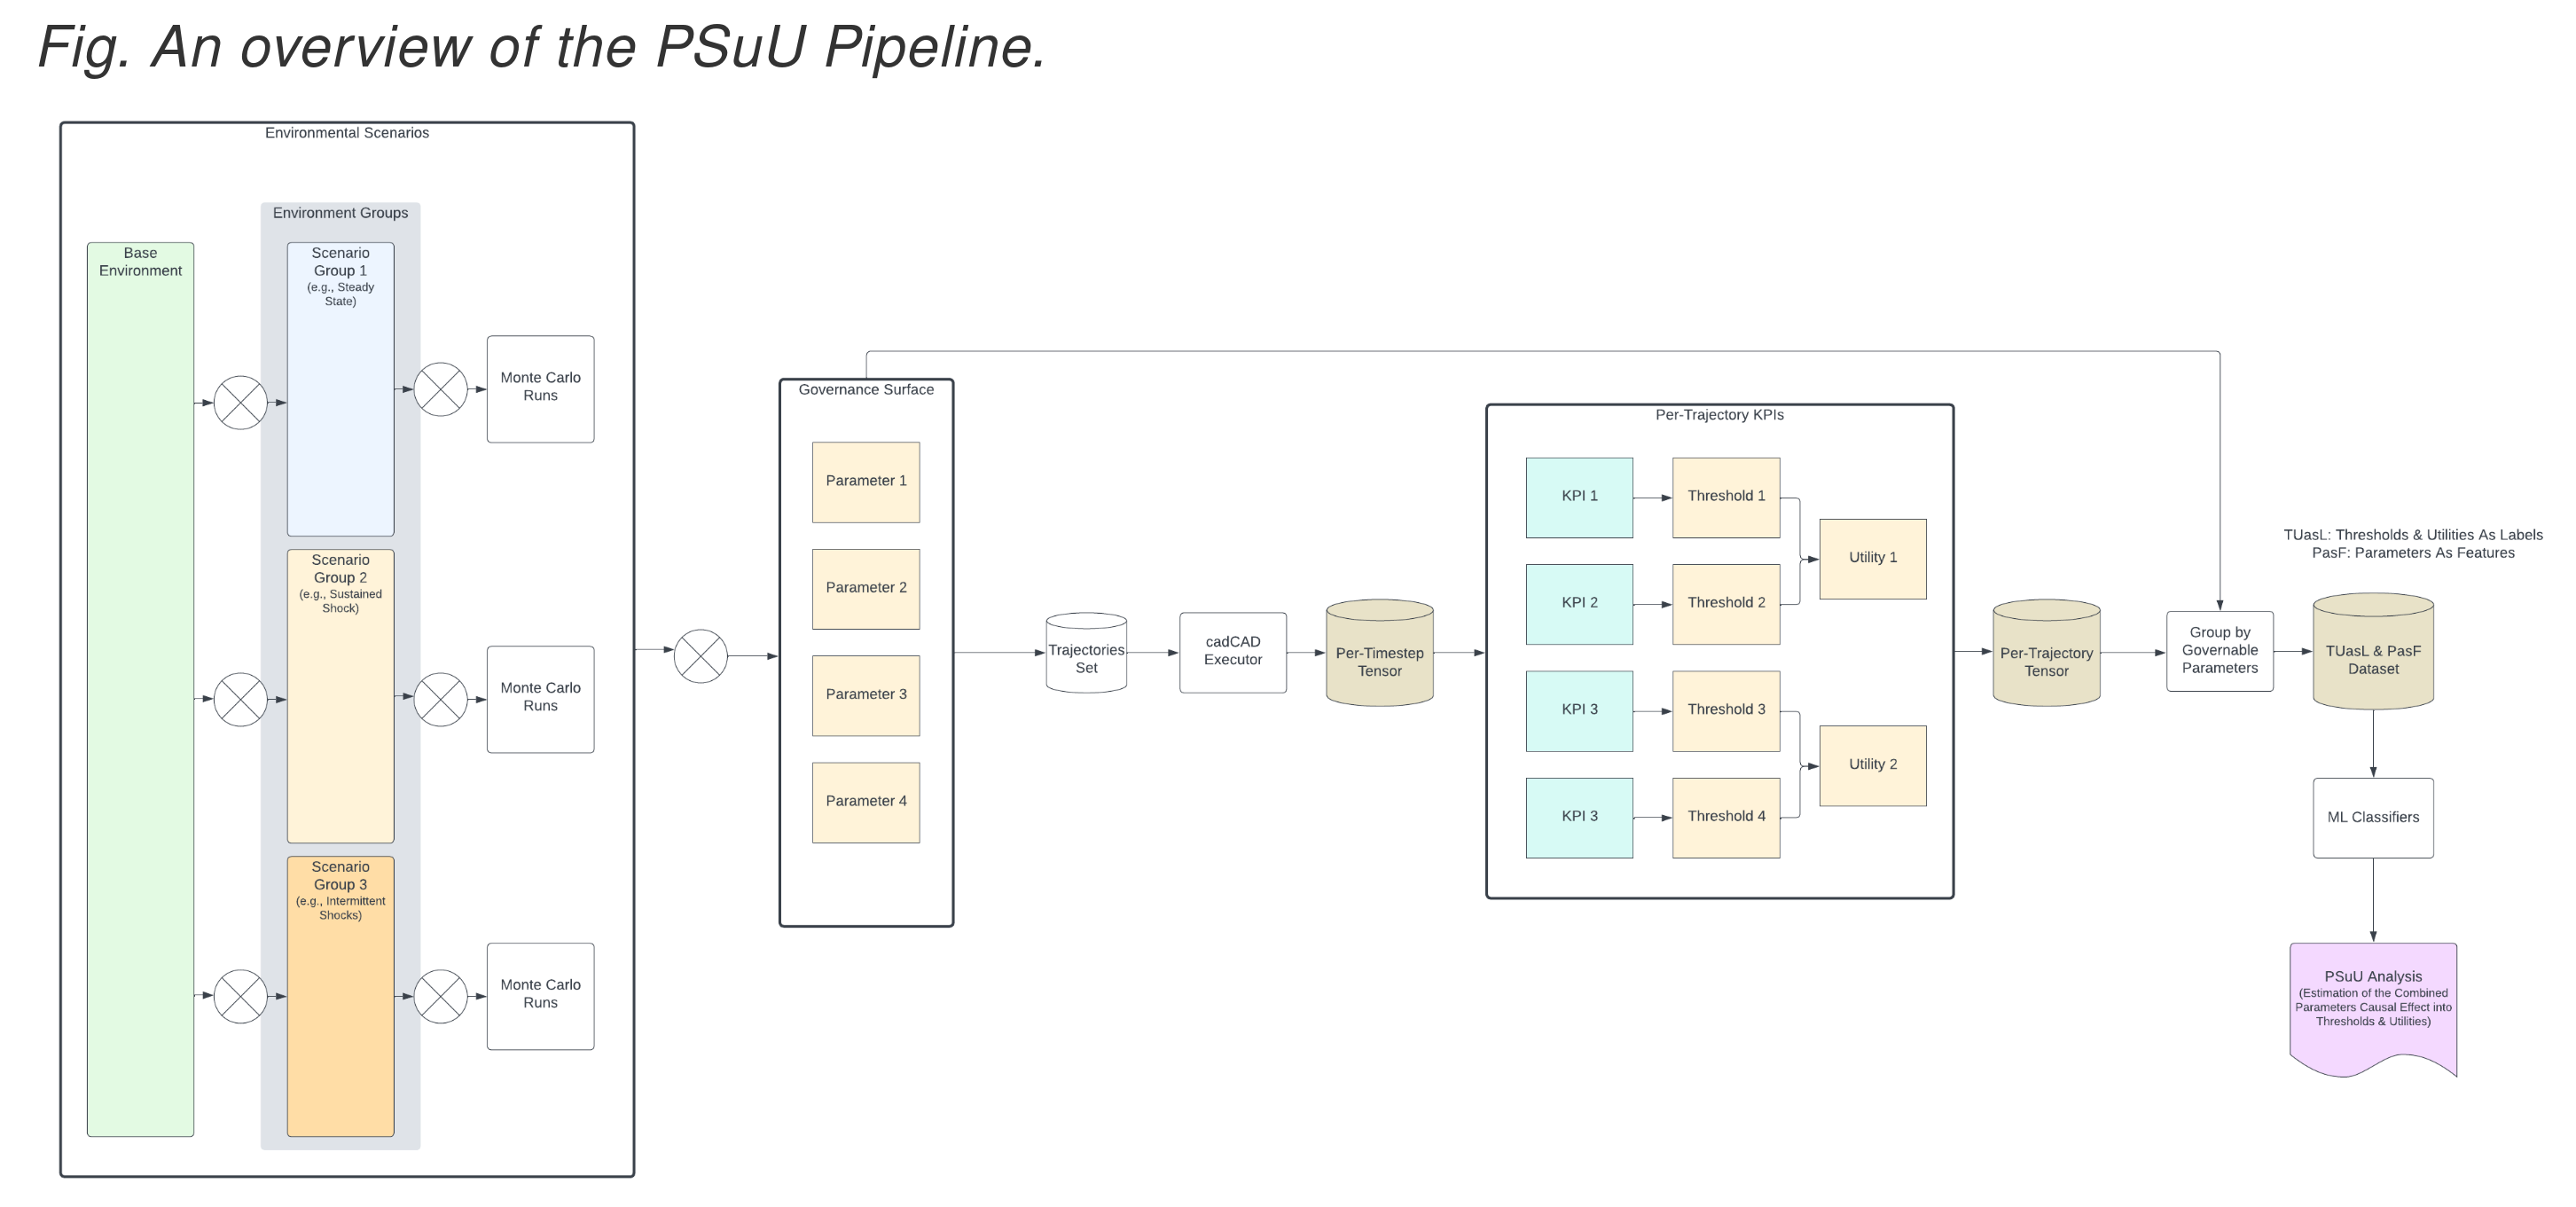

https://hackmd.io/iFeP7NemRH--KtWbPP_W0w?view

In [164]:
import pandas as pd
pd.set_option('display.max_columns', None)

import sys
sys.path.append('../')

In [165]:
latest = sorted(glob("../data/simulations/psuu-2024*"))[-1]

In [166]:
latest

'../data/simulations/psuu-2024-03-28_13-27-04.pkl.gz'

In [167]:
sim_df = pd.read_pickle(latest, compression='gzip')

Explode the reference subsidy parameter values.

In [168]:
# Function to parse a single row of subsidy components
def parse_subsidy_components(row):
    # Pattern to match each SubsidyComponent in the string
    pattern = r'SubsidyComponent\(initial_period_start=(.*?), initial_period_end=(.*?), max_cumulative_subsidy=(.*?), max_reference_subsidy=(.*?)\)'
    
    # Find all matches of the pattern
    matches = re.findall(pattern, row)
    
    # Initialize a dictionary to hold the parsed values
    parsed_values = {}
    
    # Loop through each match and extract values
    for i, match in enumerate(matches, start=1):
        keys = ['initial_period_start', 'initial_period_end', 'max_cumulative_subsidy', 'max_reference_subsidy']
        for j, key in enumerate(keys):
            parsed_values[f'component_{i}_{key}'] = match[j]
    
    return pd.Series(parsed_values)

# Apply the parsing function to each row and join the results with the original DataFrame
expanded_df = sim_df['reference_subsidy_components'].apply(parse_subsidy_components)

# Join the expanded columns back to the original DataFrame (if needed)
sim_df_expanded = sim_df.join(expanded_df)

In [169]:
sim_df = sim_df_expanded

In [170]:
from subspace_model.params import GOVERNANCE_SURFACE

In [171]:
governance_surface_params = (set(GOVERNANCE_SURFACE.keys()) | {c for c in sim_df_expanded.columns if 'component' in c}) - {'reference_subsidy_components'}
governance_surface_params

{'component_1_initial_period_end',
 'component_1_initial_period_start',
 'component_1_max_cumulative_subsidy',
 'component_1_max_reference_subsidy',
 'component_2_initial_period_end',
 'component_2_initial_period_start',
 'component_2_max_cumulative_subsidy',
 'component_2_max_reference_subsidy',
 'compute_weight_to_fee',
 'reward_proposer_share'}

In [172]:
trajectory_id_columns = ['simulation', 'subset', 'run']
agg_columns = ['simulation', 'subset', 'run'] + list(governance_surface_params)

In [173]:
sim_df.columns

Index(['days_passed', 'blocks_passed', 'circulating_supply', 'user_supply',
       'earned_supply', 'issued_supply', 'earned_minus_burned_supply',
       'total_supply', 'sum_of_stocks', 'storage_fee_per_rewards',
       'block_utilization', 'avg_blockspace_usage',
       'dsf_relative_disbursal_per_day', 'reward_issuance_balance',
       'other_issuance_balance', 'operators_balance', 'nominators_balance',
       'holders_balance', 'farmers_balance', 'staking_pool_balance',
       'fund_balance', 'burnt_balance', 'nominator_pool_shares',
       'operator_pool_shares', 'block_reward', 'blockchain_history_size',
       'total_space_pledged', 'allocated_tokens', 'buffer_size',
       'reference_subsidy', 'average_priority_fee',
       'average_compute_weight_per_tx', 'average_transaction_size',
       'transaction_count', 'average_compute_weight_per_bundle',
       'average_bundle_size', 'bundle_count', 'compute_fee_multiplier',
       'compute_fee_volume', 'free_space', 'extrinsic_length

In [174]:
sim_df

,days_passed,blocks_passed,circulating_supply,user_supply,earned_supply,issued_supply,earned_minus_burned_supply,total_supply,sum_of_stocks,storage_fee_per_rewards,block_utilization,avg_blockspace_usage,dsf_relative_disbursal_per_day,reward_issuance_balance,other_issuance_balance,operators_balance,nominators_balance,holders_balance,farmers_balance,staking_pool_balance,fund_balance,burnt_balance,nominator_pool_shares,operator_pool_shares,block_reward,blockchain_history_size,total_space_pledged,allocated_tokens,buffer_size,reference_subsidy,average_priority_fee,average_compute_weight_per_tx,average_transaction_size,transaction_count,average_compute_weight_per_bundle,average_bundle_size,bundle_count,compute_fee_multiplier,compute_fee_volume,free_space,extrinsic_length_in_bytes,storage_fee_in_credits_per_bytes,storage_fee_volume,priority_fee_volume,consensus_extrinsic_fee_volume,rewards_to_nominators,max_normal_weight,max_bundle_weight,target_block_fullness,adjustment_variable,storage_fees_to_farmers,storage_fees_to_fund,target_block_delta,targeted_adjustment_parameter,tx_compute_weight,simulation,subset,run,timestep,delta_days,delta_blocks,average_compute_weight_per_budle,label,environmental_label,timestep_in_days,reference_subsidy_components,block_time_in_seconds,reward_proposer_share,max_credit_supply,compute_weight_to_fee,component_1_initial_period_start,component_1_initial_period_end,component_1_max_cumulative_subsidy,component_1_max_reference_subsidy,component_2_initial_period_start,component_2_initial_period_end,component_2_max_cumulative_subsidy,component_2_max_reference_subsidy
0,0,0.0,8.745000e+08,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,1.134600e+09,9.909000e+08,0.000000e+00,0.000000e+00,8.745000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,256,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0,0,1,0,NaN,NaN,NaN,standard,weekly-varying,1,"[SubsidyComponent(initial_period_start=0.0, in...",6,0.100000,3000000000,1000,0.0,0.0,4,900000000.0,219000.0,2628000.0,1,900000000.0
0,0,0.0,8.745000e+08,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,1.134600e+09,9.909000e+08,0.000000e+00,0.000000e+00,8.745000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,256,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0,0,1,0,NaN,NaN,NaN,standard,weekly-varying,1,"[SubsidyComponent(initial_period_start=0.0, in...",6,0.100000,3000000000,1000,0.0,0.0,1,1500000000.0,438000.0,10512000.0,1,1500000000.0
0,0,0.0,8.745000e+08,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,1.134600e+09,9.909000e+08,0.000000e+00,0.000000e+00,8.745000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,256,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0,0,1,0,NaN,NaN,NaN,standard,weekly-varying,1,"[SubsidyComponent(initial_period_start=0.0, in...",6,0.100000,3000000000,1000,438000.0,438000.0,1,900000000.0,219000.0,10512000.0,4,1500000000.0
0,0,0.0,8.745000e+08,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,1.134600e+09,9.909000e+08,0.000000e+00,0.000000e+00,8.745000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,256,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e

In [175]:
sim_df['days_passed'].max()

1096

In [176]:
sim_df['allocated_tokens'].mean()

345581242.741724

In [177]:
vested_community_ownded_supply_allocation = 1/33.03

In [178]:
sim_df['vested_community_owned_supply'] = sim_df['allocated_tokens'] * vested_community_ownded_supply_allocation

1. Vested Community owned supply
2. Community owned supply at launch
3. Issued Supply

The sum of the above three is the community owned supply

In [216]:
from subspace_model.const import MAX_CREDIT_ISSUANCE, ISSUANCE_FOR_FARMERS

In [180]:
community_owned_supply_at_launch = 0.2225 * MAX_CREDIT_ISSUANCE
community_owned_supply_at_launch

667500000.0

0        0.000000e+00
0        0.000000e+00
0        0.000000e+00
0        0.000000e+00
0        0.000000e+00
             ...     
65748    9.961841e+09
65763    9.961841e+09
65763    9.961841e+09
65763    9.969140e+09
65763    9.976440e+09
Name: block_reward, Length: 28522, dtype: float64

In [ ]:
from sub

In [217]:
sim_df['community_owned_supply'] = sim_df['vested_community_owned_supply'] + community_owned_supply_at_launch + ISSUANCE_FOR_FARMERS-sim_df['reward_issuance_balance']

In [218]:
sim_df['community_owned_supply_fraction'] = sim_df['community_owned_supply'] / sim_df['total_supply']

In [219]:
import numpy as np

In [220]:
def cos_fraction(row) -> float:
	if np.isfinite(row.circulating_supply):
		if row.total_supply > 0 :
			return row.community_owned_supply / row.total_supply
		else:
			return float('nan')
	else:
		return float('nan')

sim_df['cos_fraction'] = sim_df.apply(cos_fraction, axis=1)

In [221]:
import hvplot.pandas

In [222]:
sim_df.hvplot.step(x='days_passed', y='cos_fraction', groupby=['run','subset'])

:DynamicMap   [run,subset]
   :Curve   [days_passed]   (cos_fraction)

In [225]:
sim_df.hvplot.step(x='days_passed', y=['community_owned_supply', 'total_supply'], groupby=['run','subset'])

:DynamicMap   [run,subset]
   :NdOverlay   [Variable]
      :Curve   [days_passed]   (value)

In [233]:
sim_df['cos_fraction']

0             NaN
0             NaN
0             NaN
0             NaN
0             NaN
           ...   
65748    0.499883
65763    0.612690
65763    0.612690
65763    0.501467
65763    0.501467
Name: cos_fraction, Length: 28522, dtype: float64

In [234]:
def trajectory_average_community_owned_supply_fraction(trajectory_df) -> float:
    return trajectory_df.cos_fraction.mean()


In [235]:
KPIs_per_trajectory = {
    'average_community_owned_supply_fraction': trajectory_average_community_owned_supply_fraction,
}

In [236]:
KPIs_per_trajectory

{'average_community_owned_supply_fraction': <function __main__.trajectory_average_community_owned_supply_fraction(trajectory_df) -> float>}

In [237]:
agg_columns

['simulation',
 'subset',
 'run',
 'component_2_max_reference_subsidy',
 'component_1_max_reference_subsidy',
 'component_2_initial_period_end',
 'compute_weight_to_fee',
 'component_1_initial_period_end',
 'component_1_max_cumulative_subsidy',
 'component_1_initial_period_start',
 'reward_proposer_share',
 'component_2_initial_period_start',
 'component_2_max_cumulative_subsidy']

In [238]:
sim_df.query("subset == 1 & run == 1")['community_owned_supply_fraction']

32882         inf
32882         inf
32882         inf
32882         inf
32897    0.357832
           ...   
49307    0.499883
49322    0.612646
49322    0.612646
49322    0.501467
49322    0.501467
Name: community_owned_supply_fraction, Length: 4388, dtype: float64

In [239]:
kpi_dfs = []
for kpi, kpi_f in KPIs_per_trajectory.items():
    kpi_s = sim_df.groupby(agg_columns).apply(kpi_f)
    kpi_s.name = kpi
    kpi_dfs.append(kpi_s)


all_kpi_df = pd.concat(kpi_dfs, axis=1)

In [240]:
all_kpi_df

average_community_owned_supply_fraction
simulation subset run component_2_max_reference_subsidy component_1_max_reference_subsidy component_2_initial_period_end compute_weight_to_fee component_1_initial_period_end component_1_max_cumulative_subsidy component_1_initial_period_start reward_proposer_share component_2_initial_period_start component_2_max_cumulative_subsidy                                         
0          0      1   1500000000.0                      1500000000.0                      10512000.0                     1                     0.0                            1                                  0.0                              0.333333              438000.0                         1                                                                  0.364842
                                                                                                                         1000                  0.0                            1                                  0.0                              0.100000              438000.0                         1                                                                  0.374167
                                                                                                                         10000                 0.0                            1                                  0.0                              0.100000              438000.0                         1                                                                  0.364788
                                                        900000000.0                       10512000.0                     1                     438000.0                       1                                  438000.0                         0.333333              219000.0                         4                                                                  0.364842
                                                                                                                         1000                  438000.0                       1                                  438000.0                         0.100000              219000.0                         4                                                                  0.374167
                                                                                                                         10000                 438000.0                       1                                  438000.0                         0.100000              219000.0                         4                                                                  0.364788
                      900000000.0                       900000000.0                       2628000.0                      1                     0.0                            4                                  0.0                              0.333333              219000.0                         1                                                                  0.364842
                                                                                                                         1000                  0.0                            4                                  0.0                              0.100000              219000.0                         1                                                                  0.374167
                                                                                                                         10000                 0.0                            4                                  0.0                              0.100000              219000.0                         1                                                                  0.364788
                  2   1500000000.0                      1500000000.0                      10512000.0                     1                     0.0                            1                                  0.0                  

In [ ]:
def trajectory_race_mode_fraction(trajectory_df) -> float:
    return trajectory_df.current_process.map(lambda x: (x.phase == SelectionPhase.proof_race) if type(x) == Process else False).mean()


def trajectory_skipped_fraction(trajectory_df) -> float:
    return trajectory_df.current_process.map(lambda x: (x.phase == SelectionPhase.skipped) if type(x) == Process else False).mean()

In [59]:
KPIs_per_trajectory = {
    'KPI1': lambda: 'pass',
    'KPI2': lambda: 'pass'
}

In [77]:
kpi_dfs = []
for kpi, kpi_f in KPIs_per_trajectory.items():
    kpi_s = sim_df_expanded.head(1000).groupby(agg_columns).apply(kpi_f, include_groups=False)
    kpi_s.name = kpi
    kpi_dfs.append(kpi_s)


all_kpi_df = pd.concat(kpi_dfs, axis=1)

TypeError: <lambda>() got an unexpected keyword argument 'include_groups'